### Principal Component Analysis 

PCA is a dimensionality reduction technique that transforms data into a new coordinate system, where the axes (principal components) capture the maximum variance in the data.

Objective:
Given a dataset $X \in \mathbb{R}^{n \times d}$, the goal is to find a lower-dimensional representation $Y \in \mathbb{R}^{n \times k}$ such that:
$$
Y = XW
$$
where $W \in \mathbb{R}^{d \times k}$ is the projection matrix.

Key Steps:
1. Center the Data:
   Subtract the mean from each feature to center the data at the origin:
   $$
   X_{\text{centered}} = X - \text{mean}(X)
   $$

2. Compute the Covariance Matrix:
   $$
   \Sigma = \frac{1}{n-1} X_{\text{centered}}^\top X_{\text{centered}}
   $$

3. Compute Eigenvectors and Eigenvalues:
   Solve for eigenvectors $v_i$ and eigenvalues $\lambda_i$ of $\Sigma$:
   $$
   \Sigma v_i = \lambda_i v_i
   $$

4. Select Top $k$ Components:
   Choose the eigenvectors corresponding to the $k$ largest eigenvalues to form $W$.

5. Project the Data:
   Transform the data into the new basis:
   $$
   Y = X_{\text{centered}} W
   $$

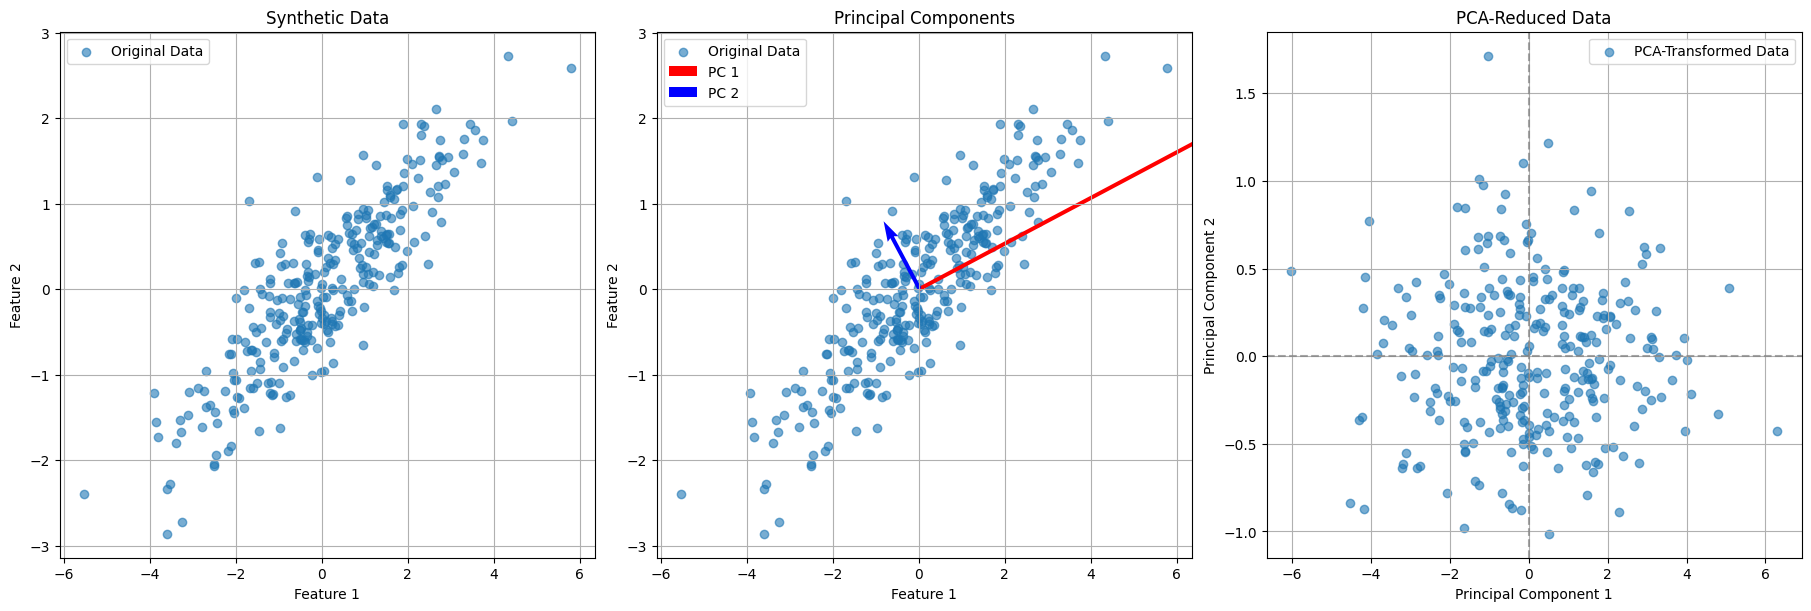

PCA Results Summary:
Principal Component Eigenvalue     Variance Explained (%)   
------------------------------------------------------------
PC 1                 3.6469         95.19                    
PC 2                 0.1843         4.81                     
------------------------------------------------------------
Total                              100.00                   


In [9]:
# Re-importing necessary libraries after the reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic data
np.random.seed(42)
mean = [0, 0]
cov = [[3, 1.5], [1.5, 1]]  # Covariance matrix
X = np.random.multivariate_normal(mean, cov, 300)

# Apply PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

# Get principal components
components = pca.components_
mean = pca.mean_

# Create a 1x3 grid for visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Original data
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.6, label="Original Data")
axes[0].set_title("Synthetic Data")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].legend()
axes[0].grid(True)

# Principal components
axes[1].scatter(X[:, 0], X[:, 1], alpha=0.6, label="Original Data")
for i, (comp, var) in enumerate(zip(components, pca.explained_variance_)):
    axes[1].quiver(*mean, *comp * np.sqrt(var), color=['red', 'blue'][i], scale=3, label=f"PC {i+1}")
axes[1].set_title("Principal Components")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].legend()
axes[1].grid(True)

# PCA-transformed data
axes[2].scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6, label="PCA-Transformed Data")
axes[2].axhline(0, color="grey", linestyle="--", alpha=0.7)
axes[2].axvline(0, color="grey", linestyle="--", alpha=0.7)
axes[2].set_title("PCA-Reduced Data")
axes[2].set_xlabel("Principal Component 1")
axes[2].set_ylabel("Principal Component 2")
axes[2].legend()
axes[2].grid(True)

plt.show()

# Calculate eigenvalues and explained variance
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = explained_variance_ratio.sum()

# Pretty-printing the results
print("PCA Results Summary:")
print(f"{'Principal Component':<20}{'Eigenvalue':<15}{'Variance Explained (%)':<25}")
print("-" * 60)
for i, (eigenvalue, variance) in enumerate(zip(eigenvalues, explained_variance_ratio), 1):
    print(f"PC {i:<18}{eigenvalue:<15.4f}{variance * 100:<25.2f}")
print("-" * 60)
print(f"{'Total':<20}{'':<15}{total_variance_explained * 100:<25.2f}")


### 3D

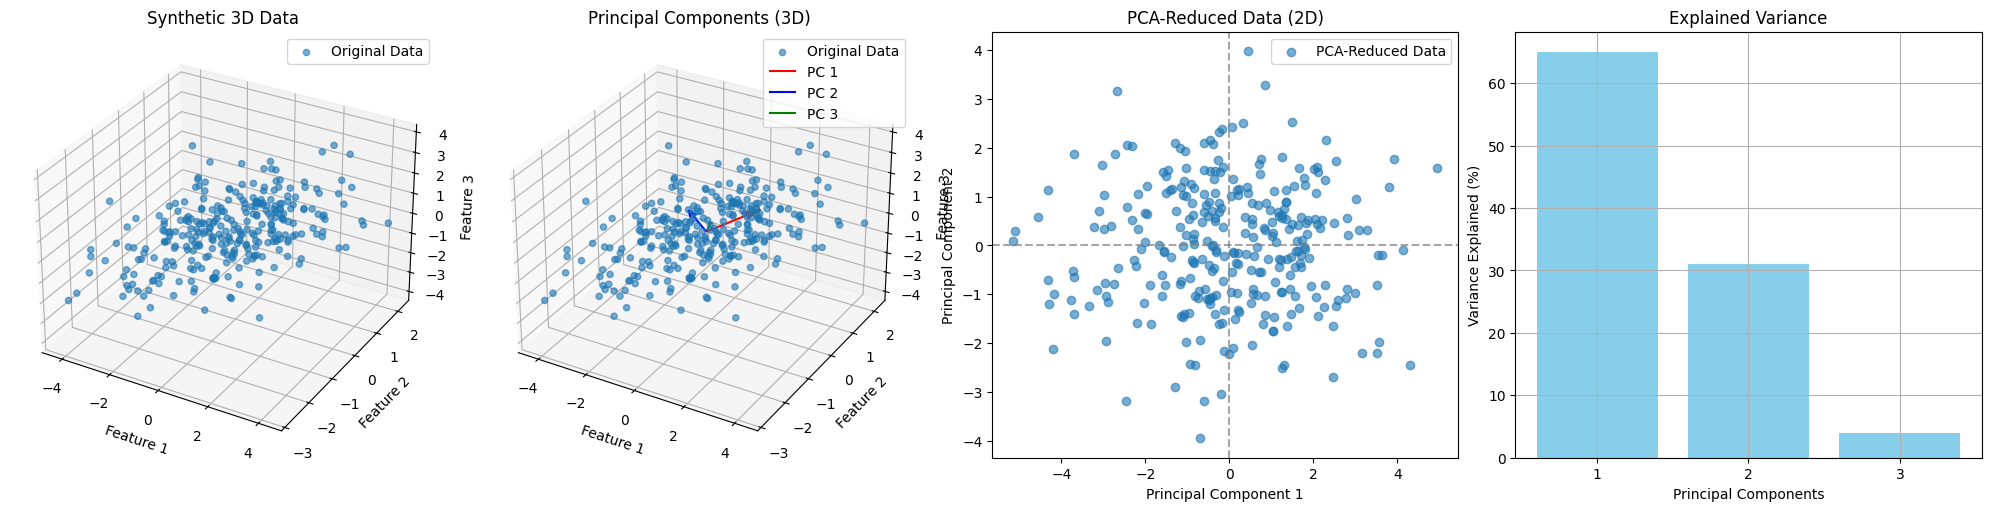

PCA Results Summary:
Principal Component Eigenvalue     Variance Explained (%)   
------------------------------------------------------------
PC 1                 3.3705         64.98                    
PC 2                 1.6084         31.01                    
PC 3                 0.2078         4.01                     
------------------------------------------------------------
Total                              100.00                   


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic 3D data
np.random.seed(42)
mean = [0, 0, 0]
cov = [[3, 1.5, 0.8], [1.5, 1, 0.5], [0.8, 0.5, 2]]  # Covariance matrix
X = np.random.multivariate_normal(mean, cov, 300)

# Apply PCA
pca = PCA(n_components=3)
X_transformed = pca.fit_transform(X)

# Get principal components
components = pca.components_
mean = pca.mean_

# Create a 1x4 grid for visualizations
fig = plt.figure(figsize=(20, 5), constrained_layout=True)

# Original 3D data visualization
ax1 = fig.add_subplot(141, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.6, label="Original Data")
ax1.set_title("Synthetic 3D Data")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("Feature 3")
ax1.legend()

# Principal components in 3D
ax2 = fig.add_subplot(142, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.6, label="Original Data")
mean_vector = mean
for i, component in enumerate(components):
    ax2.quiver(
        mean_vector[0], mean_vector[1], mean_vector[2],  # Start point
        component[0], component[1], component[2],  # Direction
        length=np.sqrt(pca.explained_variance_[i]), color=['red', 'blue', 'green'][i], label=f"PC {i+1}"
    )
ax2.set_title("Principal Components (3D)")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_zlabel("Feature 3")
ax2.legend()

# PCA-reduced 2D data visualization
ax3 = fig.add_subplot(143)
pca_2d = PCA(n_components=2)
X_transformed_2d = pca_2d.fit_transform(X)
ax3.scatter(X_transformed_2d[:, 0], X_transformed_2d[:, 1], alpha=0.6, label="PCA-Reduced Data")
ax3.axhline(0, color="grey", linestyle="--", alpha=0.7)
ax3.axvline(0, color="grey", linestyle="--", alpha=0.7)
ax3.set_title("PCA-Reduced Data (2D)")
ax3.set_xlabel("Principal Component 1")
ax3.set_ylabel("Principal Component 2")
ax3.legend()

# Variance explained bar chart
ax4 = fig.add_subplot(144)
explained_variance_ratio = pca.explained_variance_ratio_
ax4.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, color='skyblue')
ax4.set_title("Explained Variance")
ax4.set_xlabel("Principal Components")
ax4.set_ylabel("Variance Explained (%)")
ax4.set_xticks(range(1, len(explained_variance_ratio) + 1))
ax4.grid(True)

plt.show()

# Print PCA results
eigenvalues = pca.explained_variance_
total_variance_explained = explained_variance_ratio.sum()

print("PCA Results Summary:")
print(f"{'Principal Component':<20}{'Eigenvalue':<15}{'Variance Explained (%)':<25}")
print("-" * 60)
for i, (eigenvalue, variance) in enumerate(zip(eigenvalues, explained_variance_ratio), 1):
    print(f"PC {i:<18}{eigenvalue:<15.4f}{variance * 100:<25.2f}")
print("-" * 60)
print(f"{'Total':<20}{'':<15}{total_variance_explained * 100:<25.2f}")


### PCA vs Linear Regression

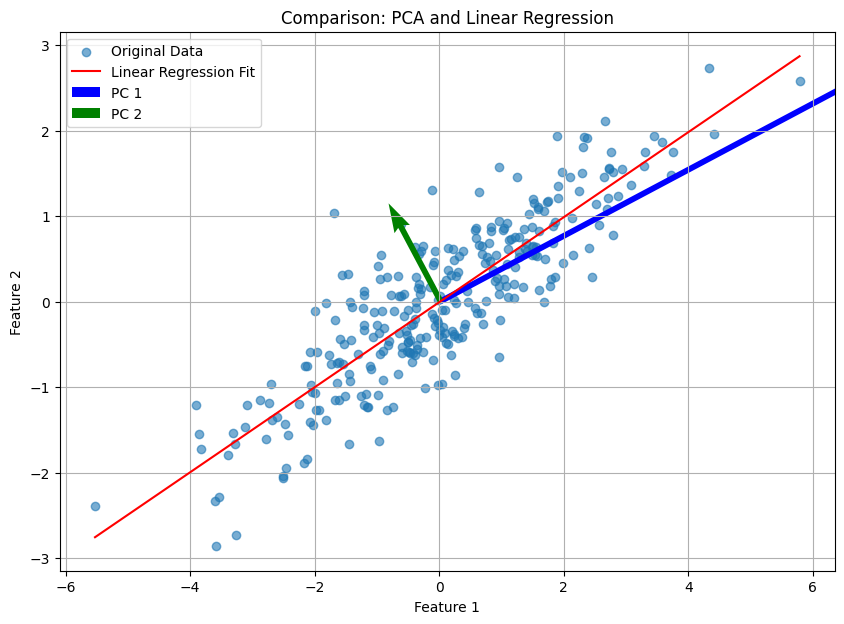

Linear Regression:
Intercept: -0.0074
Coefficient: 0.4971

PCA Results:
Principal Component 1 Direction: [0.8831871  0.46902083]
Principal Component 2 Direction: [-0.46902083  0.8831871 ]
Explained Variance Ratio: [0.95190403 0.04809597]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Generate synthetic 2D data
np.random.seed(42)
mean = [0, 0]
cov = [[3, 1.5], [1.5, 1]]  # Covariance matrix
X = np.random.multivariate_normal(mean, cov, 300)

# Separate features for linear regression
X_feature = X[:, 0].reshape(-1, 1)  # Feature for linear regression
X_target = X[:, 1]  # Target for linear regression

# Fit linear regression
linear_model = LinearRegression()
linear_model.fit(X_feature, X_target)

# Predicted line (linear regression fit)
X_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
y_line = linear_model.predict(X_line)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X)
components = pca.components_
mean = pca.mean_

# Visualization
fig, ax = plt.subplots(figsize=(10, 7))

# Scatter plot of the original data
ax.scatter(X[:, 0], X[:, 1], alpha=0.6, label="Original Data")

# Linear regression line
ax.plot(X_line, y_line, color="red", label="Linear Regression Fit")

# PCA direction (principal component)
for i, (comp, var) in enumerate(zip(components, pca.explained_variance_)):
    ax.quiver(*mean, *comp * np.sqrt(var), color=["blue", "green"][i], scale=3, label=f"PC {i + 1}")

# Labels and legend
ax.set_title("Comparison: PCA and Linear Regression")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
ax.grid(True)

plt.show()

# Print PCA and Linear Regression Results
print("Linear Regression:")
print(f"Intercept: {linear_model.intercept_:.4f}")
print(f"Coefficient: {linear_model.coef_[0]:.4f}\n")

print("PCA Results:")
print(f"Principal Component 1 Direction: {components[0]}")
print(f"Principal Component 2 Direction: {components[1]}")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


### Scree vs BiPlot

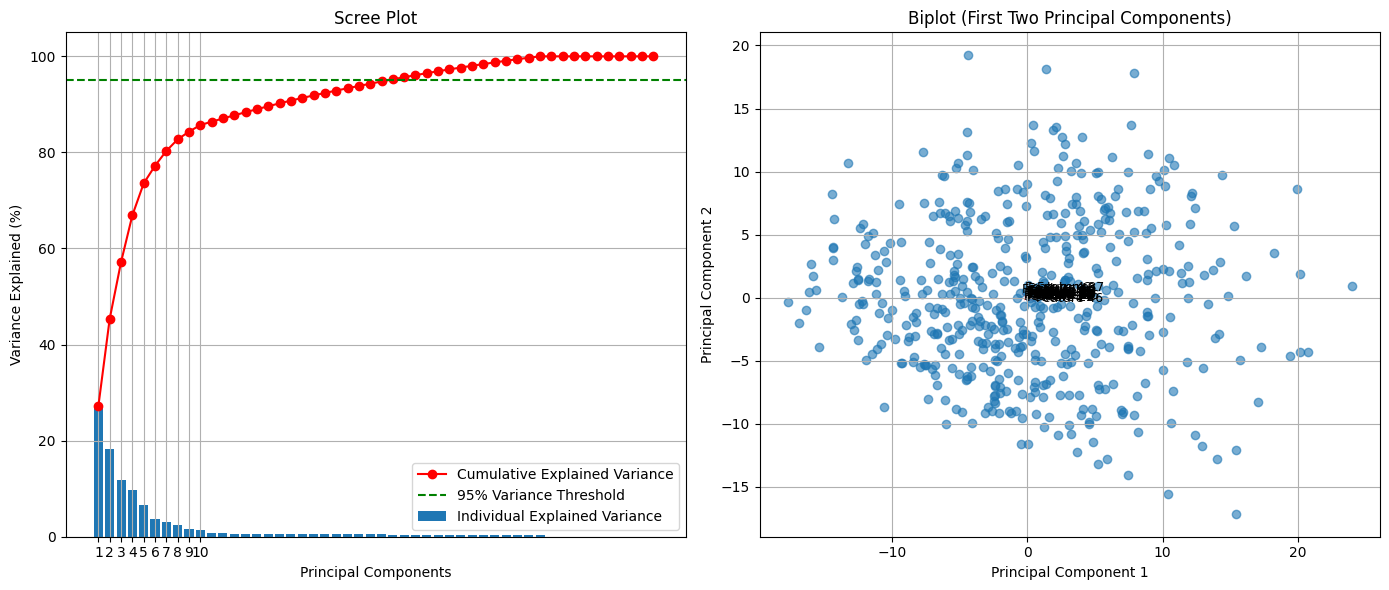

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generate a synthetic dataset with high dimensionality
np.random.seed(42)
X, _ = make_classification(n_samples=500, n_features=50, n_informative=10, n_redundant=10, random_state=42)
features = [f"Feature {i}" for i in range(1, X.shape[1] + 1)]

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Scree Plot: Explained Variance vs Principal Components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(14, 6))

# Scree plot
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, label="Individual Explained Variance")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', color='red', label="Cumulative Explained Variance")
plt.axhline(y=95, color='green', linestyle='--', label="95% Variance Threshold")
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained (%)")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)

# Biplot: First two principal components
plt.subplot(1, 2, 2)
for i in range(len(features)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, features[i], fontsize=9)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title("Biplot (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

plt.tight_layout()
plt.show()


### Pairplot

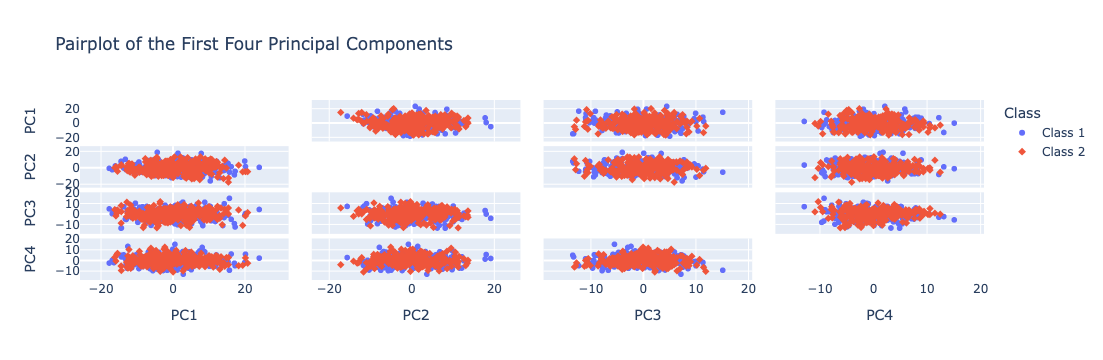

In [16]:
import plotly.express as px

# Prepare data for Plotly
pca_df_plotly = pd.DataFrame(X_pca[:, :4], columns=["PC1", "PC2", "PC3", "PC4"])
pca_df_plotly["Label"] = np.random.choice(["Class 1", "Class 2"], size=pca_df_plotly.shape[0])

# Create a pair plot using Plotly
fig = px.scatter_matrix(
    pca_df_plotly,
    dimensions=["PC1", "PC2", "PC3", "PC4"],
    color="Label",
    title="Pairplot of the First Four Principal Components",
    labels={"Label": "Class"},
    symbol="Label"
)

fig.update_traces(diagonal_visible=False)  # Hide density plots on diagonals
fig.show()


### Time series PCA

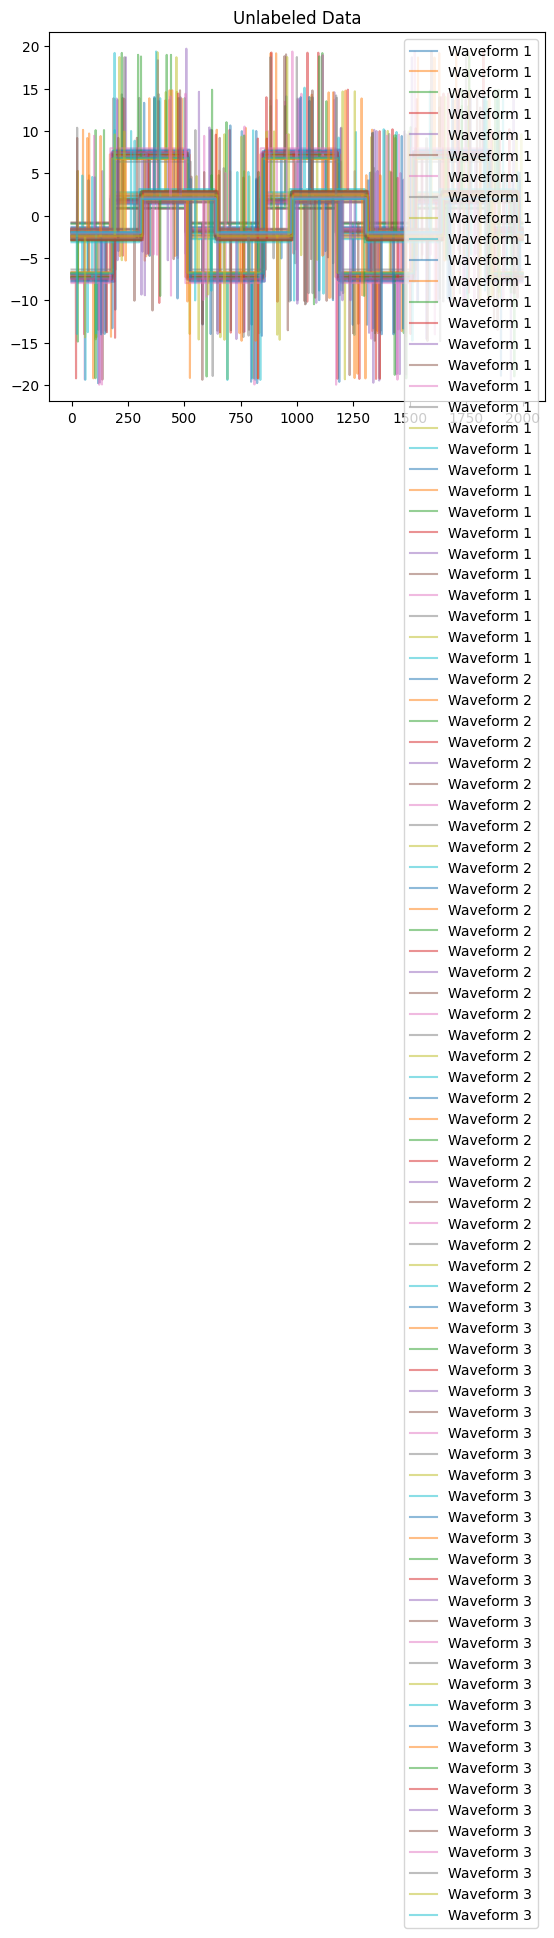

PCA Summary:
Explained variance ratio: [0.81845299 0.0706514  0.03222981 0.01287891]
Singular values: [1229.84584833  361.33847283  244.05216215  154.27419253]
Shape of transformed data: (90, 4)


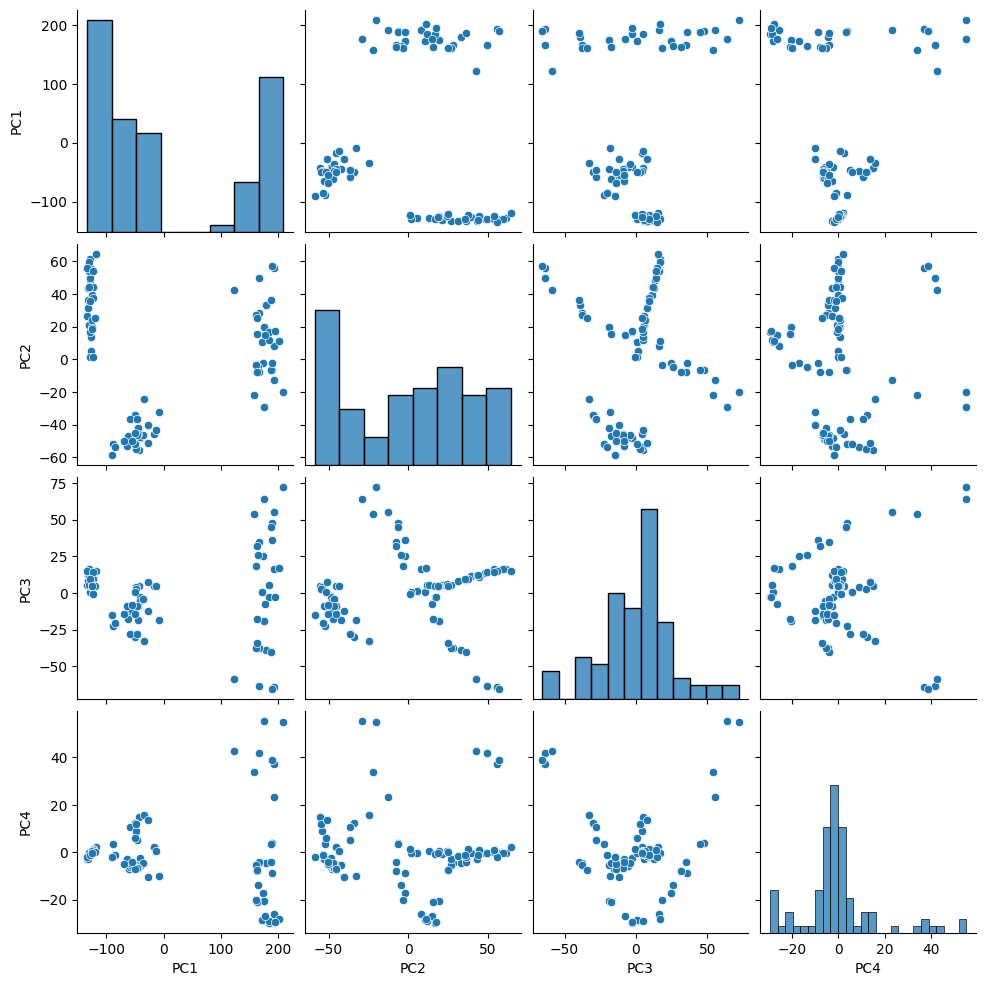

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


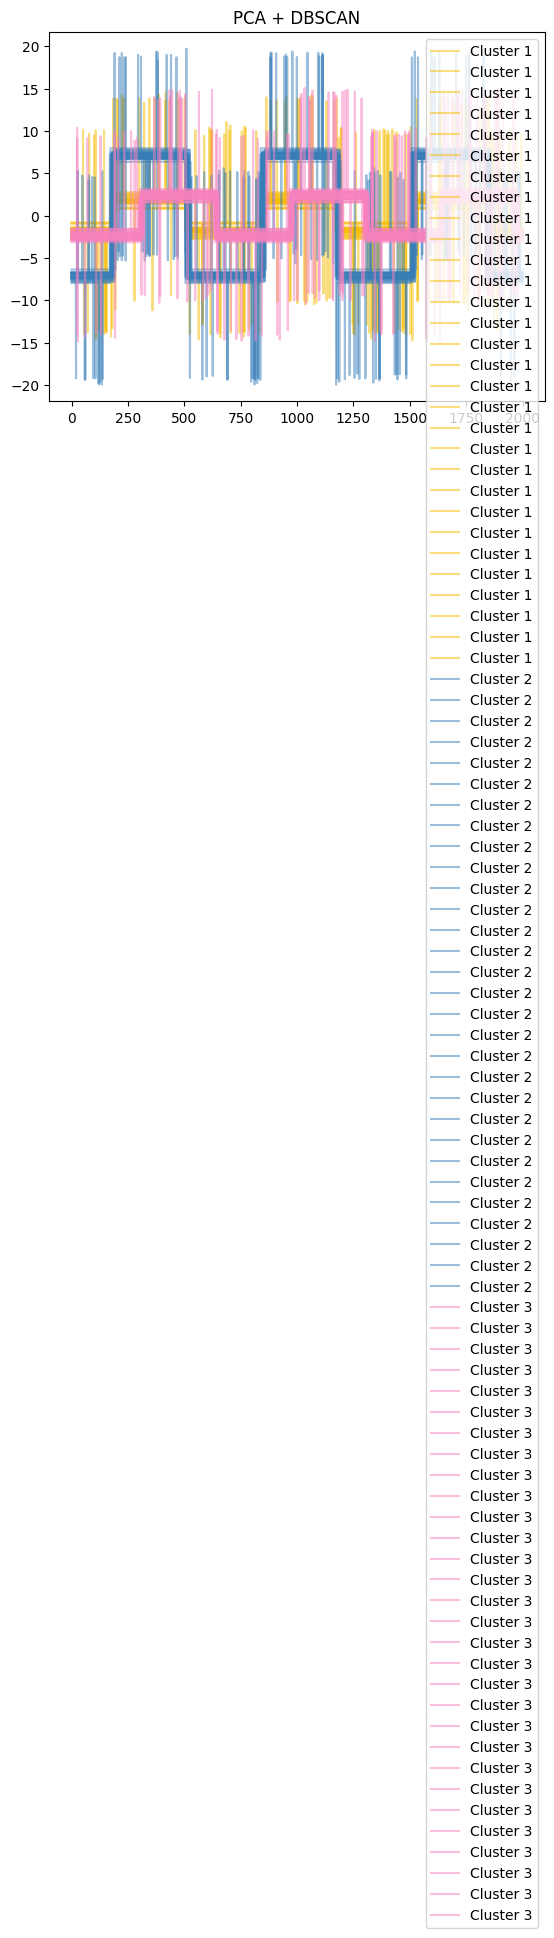

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns

# Step 1: Generate Synthetic Time Series Data
np.random.seed(0)
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)

def sqr(x):
    return np.sign(np.cos(x))

X = []
y = []
for i, (phi, a) in enumerate([(0.5, 0.15), (0.5, 0.6), (0.3, 0.2)]):
    for _ in range(30):
        phase_noise = 0.01 * np.random.normal()
        amplitude_noise = 0.04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        additional_noise[np.abs(additional_noise) < 0.997] = 0
        X.append(12 * ((a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise))) + additional_noise))
        y.append(i)

X = np.array(X)
y = np.array(y)

# Visualize the synthetic data
plt.figure()
for l in range(3):
    plt.plot(X[y == l].T, alpha=0.5, label=f'Waveform {l+1}')
plt.legend(loc='best')
plt.title('Unlabeled Data')
plt.show()

# Step 2: Apply PCA
pca = PCA(n_components=4)  # Reduce to 4 principal components
XPC = pca.fit_transform(X)

# Print PCA summary
print("PCA Summary:")
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Singular values:", pca.singular_values_)
print("Shape of transformed data:", XPC.shape)

# Visualize PCA-reduced data with pairplot
df = pd.DataFrame(XPC, columns=['PC1', 'PC2', 'PC3', 'PC4'])
sns.pairplot(df)
plt.show()

# Step 3: Clustering with DBSCAN
clustering = DBSCAN(eps=50, min_samples=3).fit(XPC[:, [0, 1]])
labels = clustering.labels_

# Print clustering results
print("Cluster labels:", labels)

# Visualize clustered data
plt.figure()
colors = ["#f7bd01", "#377eb8", "#f781bf"]
for l, color in zip(range(3), colors):
    plt.plot(X[labels == l].T, c=color, alpha=0.5, label=f'Cluster {l+1}')
plt.legend(loc='best')
plt.title('PCA + DBSCAN')
plt.show()
